# Making Attractive 2-D Vector Diagrams in Python with PlotVec

(Note that the figures below use my matplotlibrc file, which is included in the GitHub repository for plotvec.)

Let's start by loading the `plotvec()` function and plotting a single vector:

\begin{align*}
\mathbf{a} &= [2,3]^T
\end{align*}

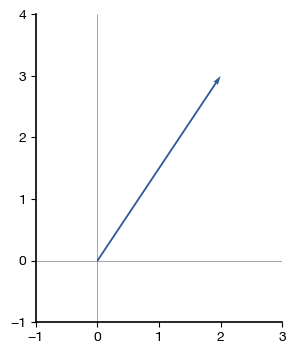

In [1]:
import numpy as np
from plotvec import plotvec

a = np.array([2, 3])

plotvec(a)

We can add multiple vectors to the diagram easily. Let's add these vectors:

Let's start by loading the `plotvec()` function and plotting a single vector:

\begin{align*}
\mathbf{b} &=[1,-2]^T
\mathbf{c} &=[-1,-1]^T
\end{align*}

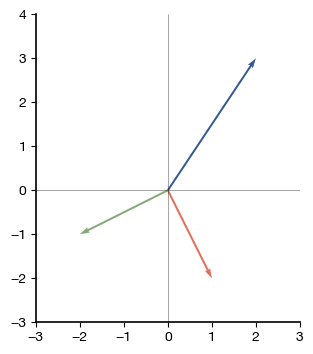

In [2]:
a = np.array([2, 3])
b = np.array([1, -2])
c = np.array([-2, -1])

plotvec(a, b, c)

Note that by default `plotvec()` uses an equal aspect ratio -- this is important in many vector diagrams, for instance to tell whether two vectors are orthogonal. For instance, in the diagram above, vectors `b` and `c` are at 90 degree angles because they are orthogonal.

If an equal aspect ratio is not needed, `plotvecR()` can be used to plot vectors but orthogonal vectors will not necessarily be at 90 degree angles:

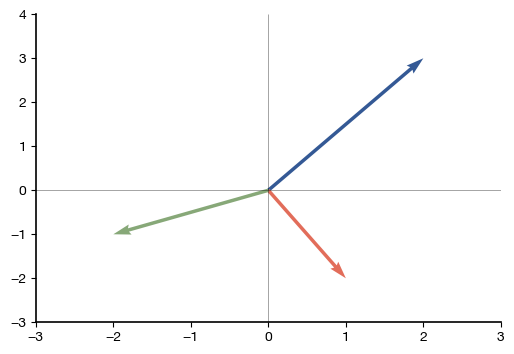

In [3]:
from plotvec import plotvecR

plotvecR(a, b, c)

A legend can be added by specifying labels:

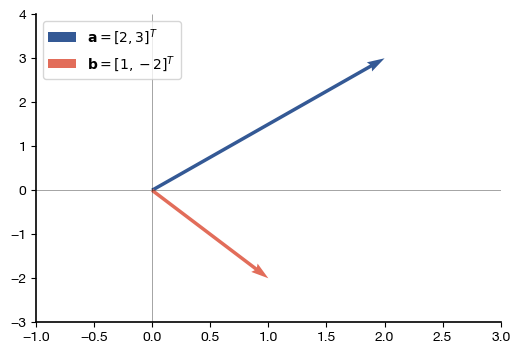

In [4]:
import numpy as np
from plotvec import plotvec, plotvecR

a = np.array([2, 3])
b = np.array([1, -2])

plotvecR(a, b,
        labels = ['$\mathbf{a} = [ 2,3]^T$',
                  '$\mathbf{b} = [ 1, -2]^T$'],
        legendloc='upper left')

By default, vectors will be plotted with their tails at the origin (0,0).  We can specify a different tail using the `tail` keyword argument:

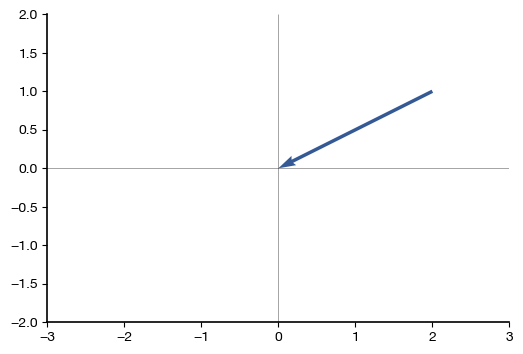

In [5]:
plotvec(c, tail=[2,1])

When plotting a sequence of vectors, we can have the tail of each vector be positioned at the head of the previous vector by settin `chain=True`:

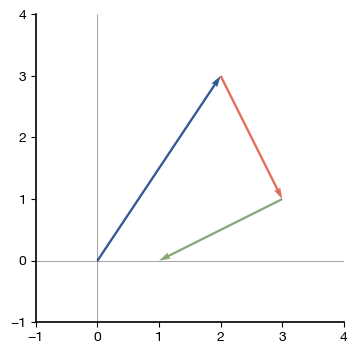

In [6]:
plotvec(a, b, c, chain=True)

When plotting with `chain=True`, the head of the last vector is at the position of the sum of the vectors. We can ask `plotvec()` to show this sum as a vector using `plotsum=True`:

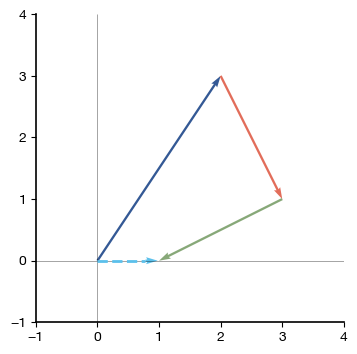

In [7]:
plotvec(a, b, c, chain=True, plotsum=True)

You can combine plot the result of multiple `plotvec()` commands on the same axes by specifying `newfig=False`. When using this option, it is good to either specify the colors of the vectors or else use the `color_offset` keyword parameter to tell later calls where to start in the color cycle. The example below also shows how to use `plot.annotate()` to label vectors:

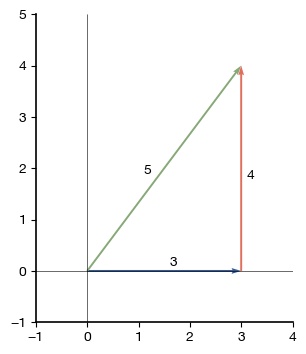

In [8]:
import matplotlib.pyplot as plt

plotvec([3,0], [0,4], chain=True);
plotvec([3,4], newfig=False, color_offset=2)
plt.annotate('3', (1.6, 0.1) );
plt.annotate('4', (3.1, 1.8) );
plt.annotate('5', (1.1, 1.9) );

## Illustrating the Effects of Two-dimensional Linear Transforms

When an $n$-vector is left-multiplied by a $m \times n$ matrix, the output is an $m$-vector. Since we can do this for every possible $n$-vector, and the outputs will fill some subspace of all $m$-vectors, we consider the matrix to define a linear transformation from the real $n$-vectors to the real $m$-vectors.

This is most easily visualized for linear transformations from $2$-vectors to other $2$-vectors, which is defined by a $2 \times 2$ matrix. 

PlotVec has two functions to help visualize such transformations.

A linear transformation of a 2-vector to another 2-vector can be considered to consist of a rotation and a scaling of the original vector. Because the transformation is linear, the amount of rotation and scaling only depends on the *direction* of the input vector and not the length of that vector. Thus, one way to visualize the effect of a linear transformation is to show how it rotates and scales all of the unit vectors. This is the purpose of the `transform_unit_vecs()` function. Its call signature is

`transform_unit_vecs(matrix, num_vectors=16, colormap='plasma', show_input_vecs=True)`

The most important argument is the only required one: the `matrix`. Let's illustrate the output for the following matrix:

In [9]:
M = np.array([[0.5, -4],
              [-2,  3]])

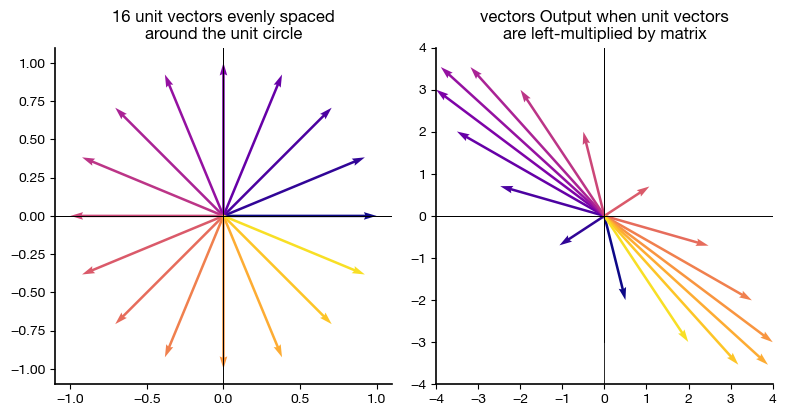

In [10]:
from plotvec import transform_unit_vecs

transform_unit_vecs(M)

The left graph shows 16 unit vectors that are color-coded and uniformly spaced in phase. The right graph shows the 16-output vectors from left-multiplying the input vectors by the given matrix. The colors of the output vectors match the colors of the corresponding input vectors. By inspecting the input and output vectors, you can see that different input vectors are scaled and rotated by different amounts. 

Another way to think about a linear transformation is think about it as stretching, rotating, and flipping space. We can visualize this by creating a field of points and then showing the location of those points after the transformation. PlotVec has a `transform_field()` function to do this. Again, it uses colors to indicate corresponding input and output points. 

The code below use `transform_field()` to generate a uniformly spaced, rectangular set of input points and to show both these input points and the output points after the linear transformation using the `M` matrix in the example above. It sets the `preserve_axes` argument to `False` to allow the axes to expand to fit the output points, which occupy much more space then the input points.


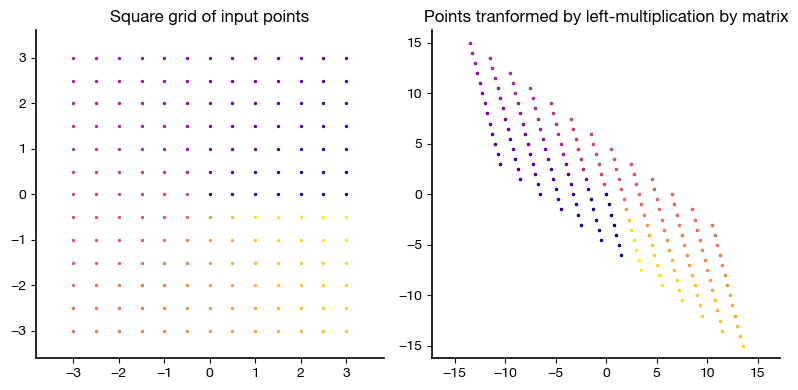

In [13]:
from plotvec import transform_field

transform_field(M, preserve_axes=False)

The graphs show that the rectangular field of input points (on the left) is transformed into a parallelogram of points at the output (on the right).